In [22]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageDraw, ImageFilter


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

x_ex = x.reshape(x.shape[0], 28, 28, 1)

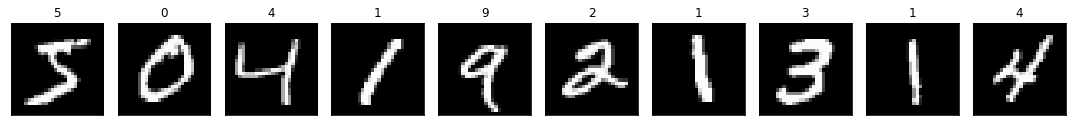

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(x[i], cmap='gray')
	ax.set_title(chr(y[i] + 48))
plt.tight_layout()
plt.show()

In [4]:
datagen = ImageDataGenerator(featurewise_center=True)
datagen.fit(x_ex)
X_y = datagen.flow(x_ex, y, batch_size = len(y), shuffle=False)
dset = X_y[0][0][:].astype('uint8')

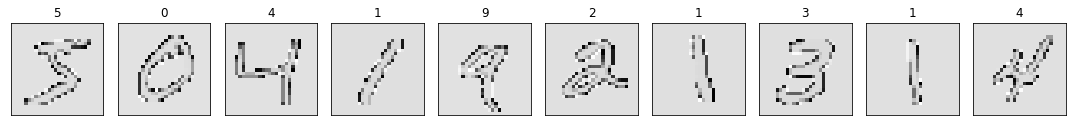

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(dset[i], cmap='gray')
	ax.set_title(chr(y[i] + 48))
plt.tight_layout()
plt.show()

33.385964741253645


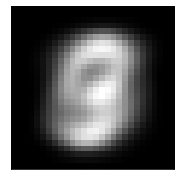

In [31]:
x_mean = np.mean(x, axis=0)
mean = np.mean(x_mean.flatten())
print(mean)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs.imshow(x_mean, cmap='gray')

plt.show()

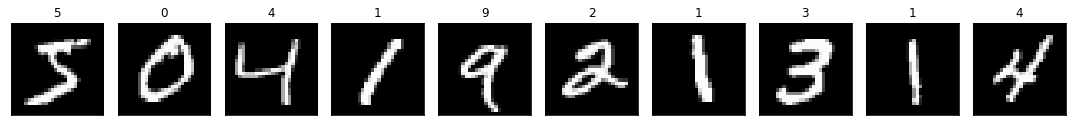

In [7]:
x_subtr = x - mean

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(x_subtr[i], cmap='gray')
	ax.set_title(chr(y[i] + 48))
plt.tight_layout()
plt.show()

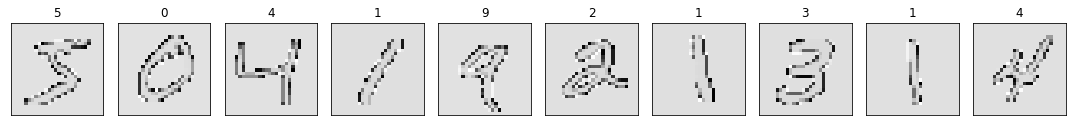

In [8]:
x_subtr_uint8 = (x - mean).astype('uint8')

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(x_subtr_uint8[i], cmap='gray')
	ax.set_title(chr(y[i] + 48))
plt.tight_layout()
plt.show()

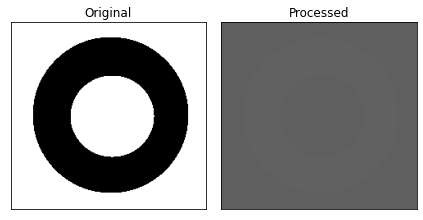

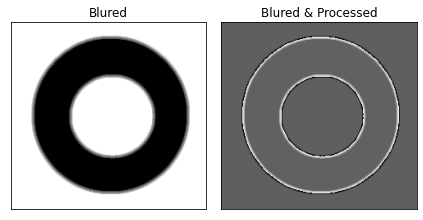

In [30]:
pic = Image.open("circle.bmp")

pix = np.array(pic)
pix_uint8 = (pix - np.mean(pix)).astype('uint8')


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0].imshow(pix, cmap=plt.cm.binary)
axs[0].set_title('Original')
axs[1].imshow(pix_uint8, cmap='gray')
axs[1].set_title('Processed')
plt.tight_layout()
plt.show()

pic_b = pic.filter(ImageFilter.BLUR)
pix_b = np.array(pic_b)
pix_b_uint8 = (pix_b - np.mean(pix_b)).astype('uint8')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0].imshow(pic_b, cmap=plt.cm.binary)
axs[0].set_title('Blured')
axs[1].imshow(pix_b_uint8, cmap='gray')
axs[1].set_title('Blured & Processed')
plt.tight_layout()
plt.show()
